In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import statsmodels.formula.api as smf 

In [64]:
data = pd.read_csv('transformed_salary.csv')
# data= data.drop('instance_no', axis=1)
data.head()

,yr,yd,sl,IsMale,IsMasters,rk_associate,rk_full
0,25,35,36350,1,0,0,1
1,13,22,35350,1,0,0,1
2,10,23,28200,1,0,0,1
3,7,27,26775,0,0,0,1
4,19,30,33696,1,1,0,1


Here is how we interpret the coding of rk_associate & rk_full:
if associate then rk_associate= 1
if full then rk_full= 1
if assistant then rk_associate=0 & rk_full= 0!

In [65]:
data.shape

(52, 7)

In [66]:
data.columns

Index(['yr', 'yd', 'sl', 'IsMale', 'IsMasters', 'rk_associate', 'rk_full'], dtype='object')

In [90]:
# separate features and the response variable:
X= data[['yr', 'yd','IsMale', 'IsMasters', 'rk_associate', 'rk_full']]
y= data['sl']

In [91]:
# Regression using sklearn
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)
print(regr.intercept_)

[   476.30901514   -124.57432076  -1166.37310099   1388.6133186
   5292.36077131  11118.76401432]
16912.420787


# Feature Selection 1 : Lasso Regression ( Least Absolute Shrinkage and Selection Operator)

In [93]:
regr = linear_model.LinearRegression()
X= data[['yr', 'yd','IsMale', 'IsMasters', 'rk_associate', 'rk_full']]
y= data['sl']

regrL =  linear_model.Lasso(alpha=10) # alpha:0 same as linear regression

regrL.fit(X, y)
print(regrL.coef_)
print(regrL.intercept_)


[   463.76548465   -104.5212311    -981.46770598   1182.69573663
   5013.92392361  10743.60596936]
16838.5041036


<img src="lasso.png">

# Feature Selection 2 : Recursive feature elimination

In [78]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV

Optimal number of features : 6
Index(['yr', 'yd', 'IsMale', 'IsMasters', 'rk_associate', 'rk_full'], dtype='object')
[ True  True  True  True  True  True]


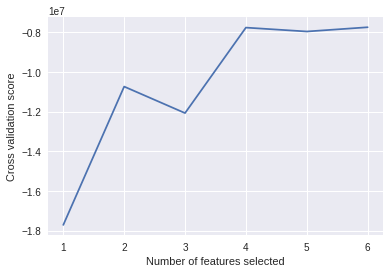

In [79]:
regr = linear_model.LinearRegression()

# The "neg_mean_squared_error" scoring:
rfecv = RFECV(estimator=regr, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
print(X.columns)
print(rfecv.support_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()